# Consumer Credit Worthiness ,Feature Engineering

In [1]:
# Import neccessary Libraries

import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

#  Model selection libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV

# Ml models
from sklearn.linear_model import LinearRegression,Lasso,Ridge    #Lasso (least absolute shrinkage and selection operator),add L1 penalty,L1 it is the sum of absolute value of the beta coefficient 
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Model evaluation libraries
from sklearn.metrics import r2_score,mean_squared_error

# Decision tree visualization
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from PIL import Image

In [2]:
# Importing Dataset

train=pd.read_excel("Consumer creditworthiness train data.xlsx")
train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,294853,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y
1,162883,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N
2,620668,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y
3,295747,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y
4,133390,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y


## Things to do in milestone 3

1. Encoding
2. Missing value encoding
3. Scaling
4. Adding new features

In [3]:
train.shape

(521, 13)

 Here 13 columns and 521 rows are there.
 Loan_ID is not an important feature,so we can drop it




In [4]:
train.drop(columns=["Loan_ID"],inplace=True)

In [5]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y


In [6]:
train.shape

(521, 12)

In [7]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             511 non-null    object 
 1   Married            518 non-null    object 
 2   Dependents         508 non-null    object 
 3   Education          521 non-null    object 
 4   Self_Employed      494 non-null    object 
 5   ApplicantIncome    521 non-null    int64  
 6   CoapplicantIncome  521 non-null    float64
 7   LoanAmount         521 non-null    int64  
 8   Loan_Amount_Term   507 non-null    float64
 9   Credit_History     478 non-null    float64
 10  Property_Area      521 non-null    object 
 11  Loan_Status        521 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 49.0+ KB


## Now let us divide categories as object and non object type

In [8]:
# Categorical type
cat_cols = train.dtypes=="object"
cat_cols=list(cat_cols[cat_cols].index)
cat_cols=cat_cols + ["Credit_History"]
#cat_cols=cat_cols + ["Income"]

# Numerical type
num_cols = train.dtypes!="object"
num_cols=list(num_cols[num_cols].index)
num_cols.remove("Credit_History")


## Missing value imputation

In [9]:
train.isnull().sum()

Gender               10
Married               3
Dependents           13
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

### We are using simpleimputer to impute missing values.For object type datatypes we can use strategy as "most_frequent" and for numerical datatypes we can use"median". 

In [10]:
train[cat_cols]=SimpleImputer(strategy="most_frequent").fit_transform(train[cat_cols])
train[num_cols]=SimpleImputer(strategy="median").fit_transform(train[num_cols])

In [11]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Adding new features

In [12]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1316025.0,0.0,250000.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1031175.0,339300.0,256000.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,675000.0,0.0,132000.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,581175.0,530550.0,240000.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,1350000.0,0.0,282000.0,360.0,1.0,Urban,Y


In [13]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### From milestone 1 analysis,the misssing features than can be analysed based on business logic are capacity,capital,charachter,conditions,age,experience,credit score,employment history,purpose of loan and surplus income

### But from our given data,we can analyse EMI,total income of family

In [14]:
## Family income can be calculated as the sum of income of applicant and co applicant

In [15]:
train["Family_income"]= train["ApplicantIncome"]+train["CoapplicantIncome"]

## EMI is the every month interest.For EMI  we have to calculate loan amount per year and we have divide it by 12 to get monthly interest.Therfore first we have to calculate loan amount per year.

 Loan amount per year can be calculated by dividing loan amount by loan amount term.
.

In [16]:
train["Loan_amount_per_year"]=train["LoanAmount"]/train["Loan_Amount_Term"]

In [17]:
train["EMI"]=train["Loan_amount_per_year"]*100000/12

## We can calculate capacity of customer to repay loan by comparising EMI with Family income .Let us assume that Family income is given monthly as loan term is multiple of 12.


In [18]:
train["Loan_repay_capacity"]=(train['EMI']<train["Family_income"]).astype(int)

## Binning

In [19]:
bins=[0,720000,1440000,2800000,5600000,20000000]
group=["very_low","low","average","high","very_high"]
train["Income"]=pd.cut(train["Family_income"],bins,labels=group)

## Encoding

Encoding are mainly of three type.
1. Label encoding
2. One-Hot encoding
3. Target encoding

1. Label encoding can be used to encode target variables
2. Target encoding can be used if we have many categories
3. One-Hot encoding also known as dummy encoding

### LabelEncoder

In [20]:
encoder=LabelEncoder()
train["Loan_Status"]=encoder.fit_transform(train["Loan_Status"])

In [21]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Family_income,Loan_amount_per_year,EMI,Loan_repay_capacity,Income
0,Male,No,0,Graduate,No,1316025.0,0.0,250000.0,360.0,1.0,Urban,1,1316025.0,694.444444,5.787037e+06,0,low
1,Male,Yes,1,Graduate,No,1031175.0,339300.0,256000.0,360.0,1.0,Rural,0,1370475.0,711.111111,5.925926e+06,0,low
2,Male,Yes,0,Graduate,Yes,675000.0,0.0,132000.0,360.0,1.0,Urban,1,675000.0,366.666667,3.055556e+06,0,very_low
3,Male,Yes,0,Not Graduate,No,581175.0,530550.0,240000.0,360.0,1.0,Urban,1,1111725.0,666.666667,5.555556e+06,0,low
4,Male,No,0,Graduate,No,1350000.0,0.0,282000.0,360.0,1.0,Urban,1,1350000.0,783.333333,6.527778e+06,0,low


In [22]:
train["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [23]:
#train['Income']=train["Income"].map({"Yes":1,"No":0})

### Mapping

In [24]:
train['Married']=train["Married"].map({"Yes":1,"No":0})

In [25]:
#train['Education']=train["Education"].map({"Graduate":1,"Not Graduate":0})


### Target Encoding

In [26]:
train['Gender']=train.groupby("Gender")["Loan_Status"].transform("mean")

In [27]:
train['Education']=train.groupby("Education")["Loan_Status"].transform("mean")

In [28]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Family_income,Loan_amount_per_year,EMI,Loan_repay_capacity,Income
0,0.691765,0,0,0.713235,No,1316025.0,0.0,250000.0,360.0,1.0,Urban,1,1316025.0,694.444444,5.787037e+06,0,low
1,0.691765,1,1,0.713235,No,1031175.0,339300.0,256000.0,360.0,1.0,Rural,0,1370475.0,711.111111,5.925926e+06,0,low
2,0.691765,1,0,0.713235,Yes,675000.0,0.0,132000.0,360.0,1.0,Urban,1,675000.0,366.666667,3.055556e+06,0,very_low
3,0.691765,1,0,0.592920,No,581175.0,530550.0,240000.0,360.0,1.0,Urban,1,1111725.0,666.666667,5.555556e+06,0,low
4,0.691765,0,0,0.713235,No,1350000.0,0.0,282000.0,360.0,1.0,Urban,1,1350000.0,783.333333,6.527778e+06,0,low


In [29]:
train["Family_income"].describe()

count    5.210000e+02
mean     1.579006e+06
std      1.474995e+06
min      3.244500e+05
25%      9.373500e+05
50%      1.199925e+06
75%      1.696950e+06
max      1.822500e+07
Name: Family_income, dtype: float64

### Mapping

In [30]:
train['Income']=train["Income"].map({"very_low":0,"low":1,"average":2,"high":3,"very_high":4})

In [31]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Family_income,Loan_amount_per_year,EMI,Loan_repay_capacity,Income
0,0.691765,0,0,0.713235,No,1316025.0,0.0,250000.0,360.0,1.0,Urban,1,1316025.0,694.444444,5.787037e+06,0,1
1,0.691765,1,1,0.713235,No,1031175.0,339300.0,256000.0,360.0,1.0,Rural,0,1370475.0,711.111111,5.925926e+06,0,1
2,0.691765,1,0,0.713235,Yes,675000.0,0.0,132000.0,360.0,1.0,Urban,1,675000.0,366.666667,3.055556e+06,0,0
3,0.691765,1,0,0.592920,No,581175.0,530550.0,240000.0,360.0,1.0,Urban,1,1111725.0,666.666667,5.555556e+06,0,1
4,0.691765,0,0,0.713235,No,1350000.0,0.0,282000.0,360.0,1.0,Urban,1,1350000.0,783.333333,6.527778e+06,0,1


### concatenating

In [32]:
for col in cat_cols:
    train=pd.concat([train, pd.get_dummies(train[col], drop_first=True,prefix=col)], axis=1)
    
train.drop(columns=cat_cols,inplace=True)

train.head()

E:\New folder (3)\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Family_income,Loan_amount_per_year,EMI,Loan_repay_capacity,Income,Gender_0.691764705882353,Married_1,Dependents_1,Dependents_2,Dependents_3+,Education_0.7132352941176471,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_1,Credit_History_1.0
0,1316025.0,0.0,250000.0,360.0,1316025.0,694.444444,5.787037e+06,0,1,1,0,0,0,0,1,0,0,1,1,1
1,1031175.0,339300.0,256000.0,360.0,1370475.0,711.111111,5.925926e+06,0,1,1,1,1,0,0,1,0,0,0,0,1
2,675000.0,0.0,132000.0,360.0,675000.0,366.666667,3.055556e+06,0,0,1,1,0,0,0,1,1,0,1,1,1
3,581175.0,530550.0,240000.0,360.0,1111725.0,666.666667,5.555556e+06,0,1,1,1,0,0,0,0,0,0,1,1,1
4,1350000.0,0.0,282000.0,360.0,1350000.0,783.333333,6.527778e+06,0,1,1,0,0,0,0,1,0,0,1,1,1


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   ApplicantIncome               521 non-null    float64 
 1   CoapplicantIncome             521 non-null    float64 
 2   LoanAmount                    521 non-null    float64 
 3   Loan_Amount_Term              521 non-null    float64 
 4   Family_income                 521 non-null    float64 
 5   Loan_amount_per_year          521 non-null    float64 
 6   EMI                           521 non-null    float64 
 7   Loan_repay_capacity           521 non-null    int32   
 8   Income                        521 non-null    category
 9   Gender_0.691764705882353      521 non-null    uint8   
 10  Married_1                     521 non-null    uint8   
 11  Dependents_1                  521 non-null    uint8   
 12  Dependents_2                  521 non-null    uint

In [34]:
train.isnull().sum()

ApplicantIncome                 0
CoapplicantIncome               0
LoanAmount                      0
Loan_Amount_Term                0
Family_income                   0
Loan_amount_per_year            0
EMI                             0
Loan_repay_capacity             0
Income                          0
Gender_0.691764705882353        0
Married_1                       0
Dependents_1                    0
Dependents_2                    0
Dependents_3+                   0
Education_0.7132352941176471    0
Self_Employed_Yes               0
Property_Area_Semiurban         0
Property_Area_Urban             0
Loan_Status_1                   0
Credit_History_1.0              0
dtype: int64

In [35]:
train["Income"].unique()

[1, 0, 2, 3, 4]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [36]:
train["Income"]=train["Income"].astype(int)

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ApplicantIncome               521 non-null    float64
 1   CoapplicantIncome             521 non-null    float64
 2   LoanAmount                    521 non-null    float64
 3   Loan_Amount_Term              521 non-null    float64
 4   Family_income                 521 non-null    float64
 5   Loan_amount_per_year          521 non-null    float64
 6   EMI                           521 non-null    float64
 7   Loan_repay_capacity           521 non-null    int32  
 8   Income                        521 non-null    int32  
 9   Gender_0.691764705882353      521 non-null    uint8  
 10  Married_1                     521 non-null    uint8  
 11  Dependents_1                  521 non-null    uint8  
 12  Dependents_2                  521 non-null    uint8  
 13  Depen

## Scaling

### StandardScaler

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
strd_train=scaler.fit_transform(train)
strd_train=pd.DataFrame(strd_train,columns=train.columns)
strd_train.head()
strd_train.describe().round(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Family_income,Loan_amount_per_year,EMI,Loan_repay_capacity,Income,Gender_0.691764705882353,Married_1,Dependents_1,Dependents_2,Dependents_3+,Education_0.7132352941176471,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_1,Credit_History_1.0
count,521.000,521.000,521.000,521.000,521.000,521.000,521.000,521.000,521.000,521.000,521.000,521.000,521.000,521.000,521.000,521.000,521.000,521.000,521.000,521.000
mean,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-0.826,-0.725,-1.635,-5.287,-0.851,-0.850,-0.850,-0.225,-1.653,-2.104,-1.359,-0.438,-0.438,-0.292,-1.900,-0.384,-0.780,-0.714,-1.482,-2.477
25%,-0.402,-0.725,-0.489,0.260,-0.435,-0.340,-0.340,-0.225,-0.416,0.475,-1.359,-0.438,-0.438,-0.292,0.526,-0.384,-0.780,-0.714,-1.482,0.404
50%,-0.256,-0.142,-0.174,0.260,-0.257,-0.183,-0.183,-0.225,-0.416,0.475,0.736,-0.438,-0.438,-0.292,0.526,-0.384,-0.780,-0.714,0.675,0.404
75%,0.044,0.349,0.236,0.260,0.080,0.066,0.066,-0.225,0.822,0.475,0.736,-0.438,-0.438,-0.292,0.526,-0.384,1.282,1.400,0.675,0.404
max,11.734,8.611,6.548,2.172,11.296,16.488,16.488,4.454,3.297,0.475,0.736,2.281,2.281,3.422,0.526,2.603,1.282,1.400,0.675,0.404


In [39]:
strd_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Family_income,Loan_amount_per_year,EMI,Loan_repay_capacity,Income,Gender_0.691764705882353,Married_1,Dependents_1,Dependents_2,Dependents_3+,Education_0.7132352941176471,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_1,Credit_History_1.0
0,0.059804,-0.725361,-0.173623,0.259532,-0.178464,-0.199043,-0.199043,-0.224507,-0.415662,0.475271,-1.359042,-0.438429,-0.438429,-0.292261,0.526271,-0.384158,-0.779759,1.400081,0.674765,0.403666
1,-0.136866,-0.021370,-0.138553,0.259532,-0.141513,-0.183423,-0.183423,-0.224507,-0.415662,0.475271,0.735813,2.280873,-0.438429,-0.292261,0.526271,-0.384158,-0.779759,-0.714244,-1.481998,0.403666
2,-0.382781,-0.725361,-0.863334,0.259532,-0.613476,-0.506236,-0.506236,-0.224507,-1.653146,0.475271,0.735813,-0.438429,-0.438429,-0.292261,0.526271,2.603098,-0.779759,1.400081,0.674765,0.403666
3,-0.447561,0.375442,-0.232073,0.259532,-0.317106,-0.225076,-0.225076,-0.224507,-0.415662,0.475271,0.735813,-0.438429,-0.438429,-0.292261,-1.900163,-0.384158,-0.779759,1.400081,0.674765,0.403666
4,0.083262,-0.725361,0.013418,0.259532,-0.155408,-0.115736,-0.115736,-0.224507,-0.415662,0.475271,-1.359042,-0.438429,-0.438429,-0.292261,0.526271,-0.384158,-0.779759,1.400081,0.674765,0.403666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,-0.533313,0.036518,-0.313903,2.172065,-0.512243,-0.408611,-0.408611,-0.224507,-0.415662,-2.104064,0.735813,-0.438429,2.280873,-0.292261,0.526271,-0.384158,1.282447,-0.714244,0.674765,0.403666
517,-0.371286,0.114947,-0.197003,0.259532,-0.327336,-0.209456,-0.209456,-0.224507,-0.415662,0.475271,0.735813,-0.438429,-0.438429,-0.292261,-1.900163,-0.384158,1.282447,-0.714244,-1.481998,-2.477294
518,-0.121331,0.168633,0.527779,0.259532,-0.064100,0.113357,0.113357,-0.224507,0.821823,0.475271,-1.359042,-0.438429,-0.438429,-0.292261,0.526271,-0.384158,1.282447,-0.714244,-1.481998,0.403666
519,-0.320642,-0.725361,-0.524323,0.259532,-0.552401,-0.355243,-0.355243,-0.224507,-0.415662,-2.104064,-1.359042,-0.438429,-0.438429,-0.292261,-1.900163,-0.384158,-0.779759,-0.714244,-1.481998,0.403666


### MinMaxScaler

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
strd_train1=scaler.fit_transform(train)
strd_train1=pd.DataFrame(strd_train1,columns=train.columns)
strd_train1.head()
strd_train1.describe().round(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Family_income,Loan_amount_per_year,EMI,Loan_repay_capacity,Income,Gender_0.691764705882353,Married_1,Dependents_1,Dependents_2,Dependents_3+,Education_0.7132352941176471,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_1,Credit_History_1.0
count,521.000,521.000,521.000,521.000,521.000,521.000,521.000,521.000,521.000,521.000,521.000,521.000,521.000,521.000,521.000,521.000,521.000,521.000,521.000,521.000
mean,0.066,0.078,0.200,0.709,0.070,0.049,0.049,0.048,0.334,0.816,0.649,0.161,0.161,0.079,0.783,0.129,0.378,0.338,0.687,0.860
std,0.080,0.107,0.122,0.134,0.082,0.058,0.058,0.214,0.202,0.388,0.478,0.368,0.368,0.270,0.413,0.335,0.485,0.473,0.464,0.347
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.034,0.000,0.140,0.744,0.034,0.029,0.029,0.000,0.250,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
50%,0.045,0.062,0.179,0.744,0.049,0.038,0.038,0.000,0.250,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000
75%,0.069,0.115,0.229,0.744,0.077,0.053,0.053,0.000,0.500,1.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [41]:
strd_train1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Family_income,Loan_amount_per_year,EMI,Loan_repay_capacity,Income,Gender_0.691764705882353,Married_1,Dependents_1,Dependents_2,Dependents_3+,Education_0.7132352941176471,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_1,Credit_History_1.0
0,0.070489,0.00000,0.178571,0.74359,0.055394,0.037538,0.037538,0.0,0.25,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
1,0.054830,0.07540,0.182857,0.74359,0.058435,0.038438,0.038438,0.0,0.25,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.035250,0.00000,0.094286,0.74359,0.019583,0.019820,0.019820,0.0,0.00,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,0.030093,0.11790,0.171429,0.74359,0.043980,0.036036,0.036036,0.0,0.25,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.072356,0.00000,0.201429,0.74359,0.057292,0.042342,0.042342,0.0,0.25,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,0.023265,0.08160,0.161429,1.00000,0.027917,0.025450,0.025450,0.0,0.25,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
517,0.036166,0.09000,0.175714,0.74359,0.043138,0.036937,0.036937,0.0,0.25,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
518,0.056067,0.09575,0.264286,0.74359,0.064808,0.055556,0.055556,0.0,0.50,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
519,0.040198,0.00000,0.135714,0.74359,0.024611,0.028529,0.028529,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Milestone:4

Things to do:
1. Make 5 classification models
2. check train and test accuracy
3. check for overfitting and underfitting,if it is there,do hyperparameter tuning
4. Make evaluation matrix
5. select the top 3 model and justify it.

## Classification is a supervised learning task in machine learning where the goal is to predict the class label of a given input data point. There are several classification algorithms in ML, some of which are listed below:

Decision Tree: It is a tree-based model that splits the data based on the most significant attribute that maximizes the information gain. The decision tree is easy to interpret and suitable for handling both categorical and numerical data.

Random Forest: It is an ensemble learning algorithm that combines multiple decision trees to make a final prediction. Random forests reduce overfitting and improve accuracy by combining multiple decision trees.

Support Vector Machines (SVM): It is a linear classification algorithm that finds the best separating hyperplane between classes. SVM is suitable for handling high-dimensional data and works well when there is a clear margin of separation between the classes.

Naive Bayes: It is a probabilistic classifier that is based on Bayes' theorem. Naive Bayes assumes that the features are independent of each other, which makes it suitable for handling large datasets with many features.

K-Nearest Neighbors (KNN): It is a lazy learning algorithm that uses a distance metric to classify data points based on the k-nearest neighbors in the training data. KNN is simple to implement and works well with small datasets.

Logistic Regression: It is a linear classification algorithm that models the probability of the class label given the input features. Logistic regression is a popular algorithm for binary classification problems.

In [42]:
strd_train1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Family_income,Loan_amount_per_year,EMI,Loan_repay_capacity,Income,Gender_0.691764705882353,Married_1,Dependents_1,Dependents_2,Dependents_3+,Education_0.7132352941176471,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_1,Credit_History_1.0
0,0.070489,0.00000,0.178571,0.74359,0.055394,0.037538,0.037538,0.0,0.25,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
1,0.054830,0.07540,0.182857,0.74359,0.058435,0.038438,0.038438,0.0,0.25,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.035250,0.00000,0.094286,0.74359,0.019583,0.019820,0.019820,0.0,0.00,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,0.030093,0.11790,0.171429,0.74359,0.043980,0.036036,0.036036,0.0,0.25,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.072356,0.00000,0.201429,0.74359,0.057292,0.042342,0.042342,0.0,0.25,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,0.023265,0.08160,0.161429,1.00000,0.027917,0.025450,0.025450,0.0,0.25,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
517,0.036166,0.09000,0.175714,0.74359,0.043138,0.036937,0.036937,0.0,0.25,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
518,0.056067,0.09575,0.264286,0.74359,0.064808,0.055556,0.055556,0.0,0.50,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
519,0.040198,0.00000,0.135714,0.74359,0.024611,0.028529,0.028529,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Target variable : Loan_Status_1

## Decision Tree

In [43]:
from sklearn.model_selection import train_test_split

X = strd_train1.drop('Loan_Status_1', axis=1)
y = strd_train1.Loan_Status_1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

1. Decision Tree Classifier
Decision Tree parameters:

criterion: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.

splitter: The strategy used to choose the split at each node. Supported strategies are "best" to choose the best split and "random" to choose the best random split.

max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_split: The minimum number of samples required to split an internal node.

min_samples_leaf: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

max_features: The number of features to consider when looking for the best split.

max_leaf_nodes: Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

min_impurity_split: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

In [45]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
             0.0    1.0  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    106.0  258.0       1.0      364.0         364.0
_______________________________________________
Confusion Matrix: 
 [[106   0]
 [  0 258]]

Test Result:
Accuracy Score: 73.25%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0         1.0  accuracy   macro avg  weighted avg
precision   0.653061    0.768519  0.732484    0.710790      0.726601
recall      0.561404    0.830000  0.732484    0.695702      0.732484
f1-score    0.603774    0.798077  0.732484    0.700925      0.727534
support    57.000000  100.000000  0.732484  157.000000    157.000000
_______________________________________________
Conf

## Decision Tree Hyperparameter tuning

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(
    tree_clf, 
    params, 
    scoring="f1", 
    n_jobs=-1, 
    verbose=1, 
    cv=5
)

tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Best paramters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 80.77%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.891304    0.795597  0.807692    0.843451      0.823468
recall       0.386792    0.980620  0.807692    0.683706      0.807692
f1-score     0.539474    0.878472  0.807692    0.708973      0.779753
support    106.000000  258.000000  0.807692  364.000000    364.000000
_______________________________________________
Confusion Matrix: 
 [[ 41  65]
 [  5 253]]

Test Result:
Accuracy Score: 79.62%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0         1.0  accuracy   macro avg  weighted avg
precision   0.962963    0.761538  0.796178    0.862251      0.834667
recall      0.456

## Visualization of a Tree

In [47]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [50]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(strd_train1.columns)
features.remove("Loan_Status_1")

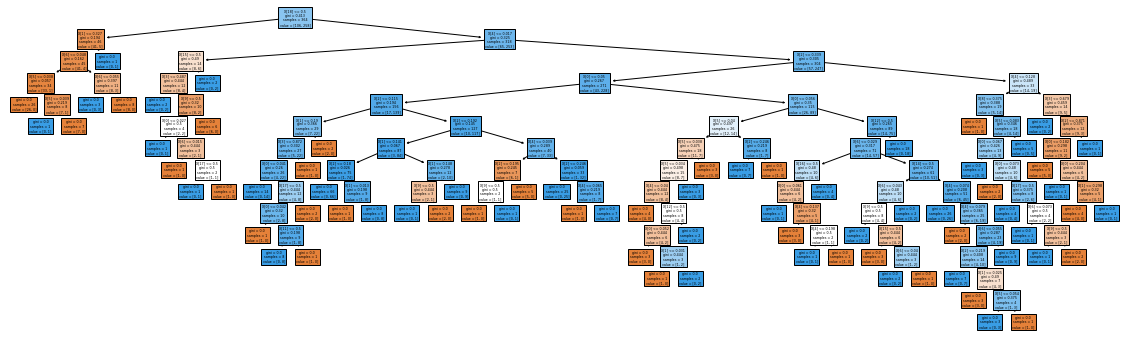

In [58]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

plt.figure(figsize=(20, 6))
plot_tree(clf, filled=True)
plt.show()

In [57]:
#dot_data = StringIO()
#export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
#graph = pydot.graph_from_dot_data(dot_data.getvalue())
#Image(graph[0].create_png())

In [ ]:
#def train_and_test_split(data,t_col,testsize = 0.3,randomstate = 3):
#    x = data.drop(t_col,axis = 1)
#    y = data[t_col]
 #   return train_test_split(x,y,test_size = testsize,random_state = randomstate)

In [ ]:
#def model_builder(model_name,model,data,t_col):
#    x_train,x_test,y_train,y_test = train_and_test_split(data,t_col)
 #   model.fit(x_train,y_train)
 #   y_pred = model.predict(x_test)
 #   r2 = r2_score(y_test,y_pred)
 #   rmse = np.sqrt(mean_squared_error(y_test,y_pred))
 #   result = [model_name,rmse,r2]
 #   return result

In [ ]:
#strd_train["Loan_Status_1"]=strd_train["Loan_Status_1"].astype(bool)

In [ ]:
#X = strd_train.drop("Loan_Status_1", axis=1)
#y = strd_train["Loan_Status_1"]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#model_builder(model_name = 'LogisticRegression',model = LogisticRegression(),data = strd_train,t_col = 'Loan_Status_1')

In [ ]:
#strd_train["Loan_Status_1"].info()

In [ ]:
#log_reg = LogisticRegression()
#log_reg.fit(X_train, y_train)

## Random Forest

Random Forest¶
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

Random forest algorithm parameters:
n_estimators: The number of trees in the forest.

criterion: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.

max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_split: The minimum number of samples required to split an internal node.

min_samples_leaf: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

max_features: The number of features to consider when looking for the best split.

max_leaf_nodes: Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

min_impurity_split: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

bootstrap: Whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree.

oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy.

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
             0.0    1.0  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    106.0  258.0       1.0      364.0         364.0
_______________________________________________
Confusion Matrix: 
 [[106   0]
 [  0 258]]

Test Result:
Accuracy Score: 77.71%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0         1.0  accuracy   macro avg  weighted avg
precision   0.823529    0.764228   0.77707    0.793879      0.785758
recall      0.491228    0.940000   0.77707    0.715614      0.777070
f1-score    0.615385    0.843049   0.77707    0.729217      0.760394
support    57.000000  100.000000   0.77707  157.000000    157.000000
_______________________________________________
Conf

## Random Forest hyperparameter tuning

###  Randomized Search Cross Validation

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf, 
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(
    estimator=rf_clf, 
    scoring='f1',
    param_distributions=random_grid, 
    n_iter=200, 
    cv=5, 
    verbose=1, 
    random_state=42,
    n_jobs=-1
)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best paramters: {'n_estimators': 1400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': True})
Train Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.902778    0.859589  0.868132    0.881183      0.872166
recall       0.613208    0.972868  0.868132    0.793038      0.868132
f1-score     0.730337    0.912727  0.868132    0.821532      0.859614
support    106.000000  258.000000  0.868132  364.000000    364.000000
_______________________________________________
Confusion Matrix: 
 [[ 65  41]
 [  7 251]]

Test Result:
Accuracy Score: 77.71%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0         1.0  accuracy   macro avg  weighted avg
precision   0.843750    0.760000   0.77707    0.801875      0.

### b) Grid Search Cross Validation

In [62]:
n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf, 
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(
    rf_clf, 
    params_grid, 
    scoring="f1", 
    cv=5, 
    verbose=1, 
    n_jobs=-1
)
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best parameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 500}
Train Result:
Accuracy Score: 81.04%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.930233    0.794393   0.81044    0.862313      0.833950
recall       0.377358    0.988372   0.81044    0.682865      0.810440
f1-score     0.536913    0.880829   0.81044    0.708871      0.780678
support    106.000000  258.000000   0.81044  364.000000    364.000000
_______________________________________________
Confusion Matrix: 
 [[ 40  66]
 [  3 255]]

Test Result:
Accuracy Score: 75.80%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0         1.0  accuracy   macro avg  weighted avg
precision   0.952381    0.727941  0.757962    0.840161      0.80